# Asignacion 2 Mineria de Datos
## Nombre: Guillermo Hernandez
## Cedula: 27.369.180

### El dataset asignado es: Churn for Bank Customers [enlace](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)

## Importamos las librerias necesarias

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


## Descargamos el dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

print("Path to dataset files:", path)

100%|██████████| 261k/261k [00:00<00:00, 55.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/churn-for-bank-customers/versions/1


Cargamos el dataset

In [ ]:
df = pd.read_csv( path + '/churn.csv' )

## Descripcion del dataset



Este dataset contiene datos de clientes en un banco.
El objetivo de este dataset, segun su descripcion es predecir la rotación de clientes en un banco.

El "Churn rate" o rotación de clientes es el porcentaje de clientes que una empresa pierde o cancela su suscripción en un periodo determinado, reflejando la fidelidad y salud del negocio.

Segun la seccion Acknowledgements:

"Como sabemos, es mucho más costoso captar un nuevo cliente que fidelizar a uno existente.

Para los bancos es ventajoso saber qué lleva a un cliente a abandonar la empresa.

La prevención de la pérdida de clientes permite a las empresas desarrollar programas de fidelización y campañas de retención para retener al máximo número de clientes posible."

In [ ]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]} \n")
print("Tipos de datos: \n")
print(df.dtypes)

Filas: 10000, Columnas: 14 

Tipos de datos: 

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Num de filas: 10000  
Columnas: 14

### Descripcion de las columnas:


1. **RowNumber**: corresponde al número de registro (fila) y no afecta el
resultado.  
2. **CustomerId**: contiene valores aleatorios y no afecta la salida del banco.  
3. **Surname**: el apellido de un cliente no influye en su decisión de dejar el banco.  
4. **CreditScore**: puede afectar la pérdida de clientes, ya que un cliente con una puntuación crediticia más alta tiene menos probabilidades de dejar el banco.  
5. **Geography**: la ubicación de un cliente puede afectar su decisión de dejar el banco.  
6. **Gender**: es interesante explorar si el género influye en la pérdida de un cliente.  
7. **Age**: esto es relevante, ya que los clientes de mayor edad tienen menos probabilidades de dejar el banco que los más jóvenes.  
8. **Staying**: se refiere a la cantidad de años que el cliente lleva siendo cliente del banco. Normalmente, los clientes de mayor edad son más fieles y tienen menos probabilidades de dejar el banco.  
9. **Balance**: también es un buen indicador de la pérdida de clientes, ya que las personas con un saldo mayor en sus cuentas tienen menos probabilidades de dejar el banco que aquellas con saldos menores.   
10. **NumOfProducts**: se refiere a la cantidad de productos que un cliente ha comprado a través del banco.  
11. **HasCrCard**: indica si un cliente tiene o no una tarjeta de crédito. Esta columna también es relevante, ya que las personas con tarjeta de crédito tienen menos probabilidades de abandonar el banco.  
12. **IsActiveMember**: los clientes activos tienen menos probabilidades de abandonar el banco.  
13. **estimatesalary**: al igual que con balance, las personas con salarios más bajos tienen más probabilidades de abandonar el banco que las personas con salarios más altos.  
14. **Exited**: independientemente de si el cliente abandonó el banco o no.




## Estadısticas descriptivas

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
stats_df = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T
display(stats_df)

,mean,median,std,min,max
RowNumber,5.000500e+03,5.000500e+03,2886.895680,1.00,10000.00
CustomerId,1.569094e+07,1.569074e+07,71936.186123,15565701.00,15815690.00
CreditScore,6.505288e+02,6.520000e+02,96.653299,350.00,850.00
Age,3.892180e+01,3.700000e+01,10.487806,18.00,92.00
Tenure,5.012800e+00,5.000000e+00,2.892174,0.00,10.00
Balance,7.648589e+04,9.719854e+04,62397.405202,0.00,250898.09
NumOfProducts,1.530200e+00,1.000000e+00,0.581654,1.00,4.00
HasCrCard,7.055000e-01,1.000000e+00,0.455840,0.00,1.00
IsActiveMember,5.151000e-01,1.000000e+00,0.499797,0.00,1.00
EstimatedSalary,1.000902e+05,1.001939e+05,57510.492818,11.58,199992.48


## Valores faltantes

In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Histogramas

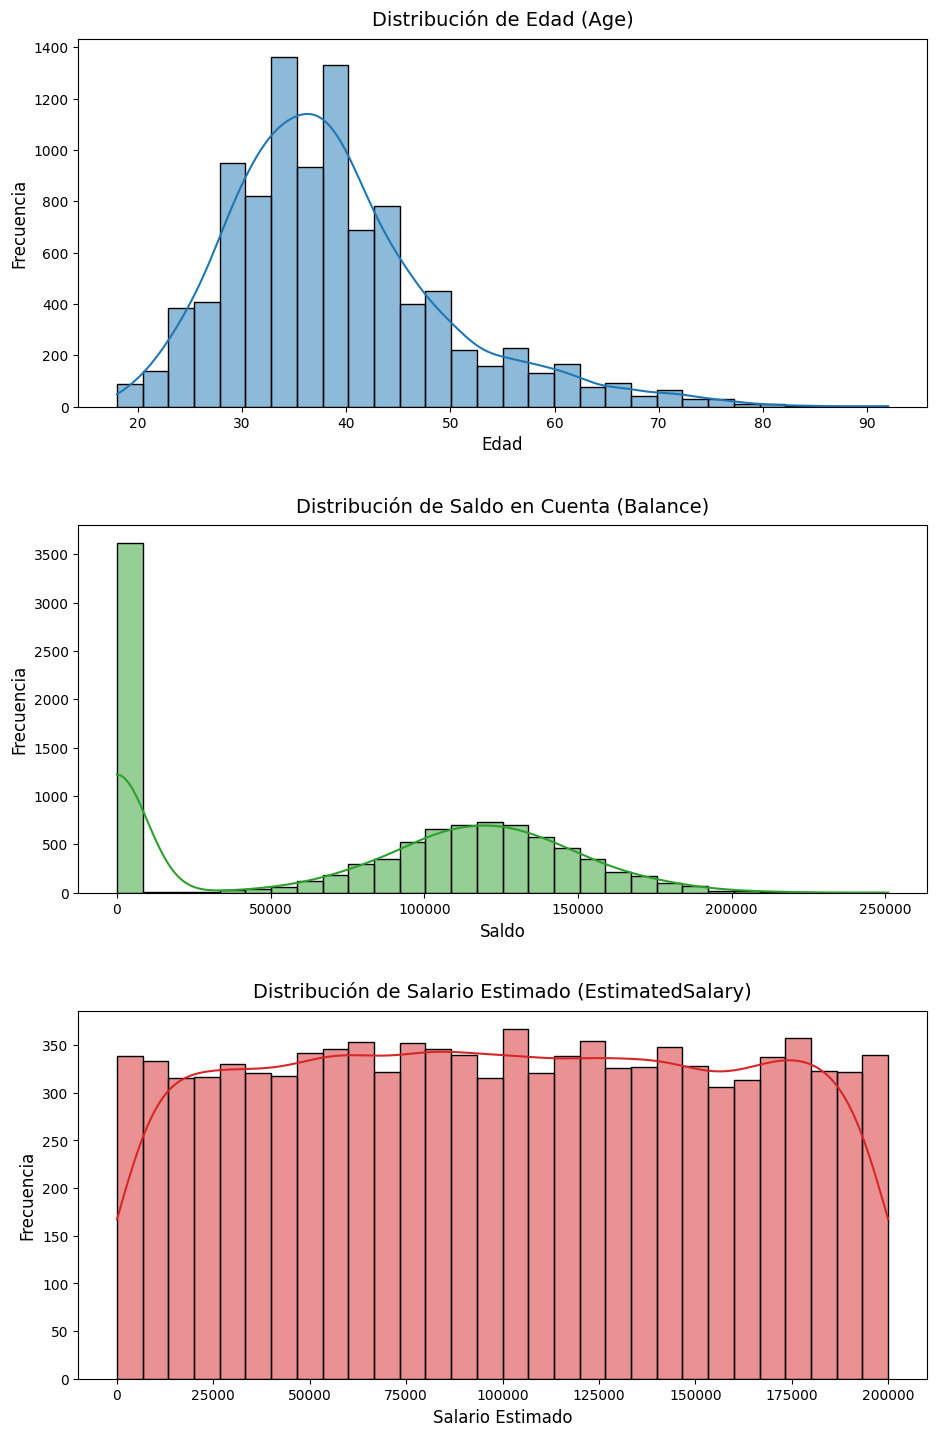

In [ ]:
# Crear una figura con 3 subplots dispuestos verticalmente (3 filas, 1 columna)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# 1. Histograma de Edad
sns.histplot(data=df, x='Age', kde=True, color='#1f77b4', ax=axes[0], bins=30)
axes[0].set_title('Distribución de Edad (Age)', fontsize=14, pad=10)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# 2. Histograma de Balance
sns.histplot(data=df, x='Balance', kde=True, color='#2ca02c', ax=axes[1], bins=30)
axes[1].set_title('Distribución de Saldo en Cuenta (Balance)', fontsize=14, pad=10)
axes[1].set_xlabel('Saldo', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)

# 3. Histograma de Salario Estimado
sns.histplot(data=df, x='EstimatedSalary', kde=True, color='#d62728', ax=axes[2], bins=30)
axes[2].set_title('Distribución de Salario Estimado (EstimatedSalary)', fontsize=14, pad=10)
axes[2].set_xlabel('Salario Estimado', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)

# Ajustar el espaciado para que no se superpongan los textos
plt.tight_layout(pad=3.0)
plt.show()

### Observaciones:

Edad:
La distribución no es perfectamente normal, tiene un ligero sesgo, la mayor concentración de clientes está entre los 30 y 40 años.
La cola derecha es larga, lo que indica que hay clientes de edad avanzada, aunque son menos frecuentes.

Saldo en Cuenta:
El pico en 0, esa barra enorme a la izquierda indica que un porcentaje muy alto de clientes tiene un saldo de 0 USD. Esto podría significar que usan el banco solo para productos que no requieren saldo (como tarjetas de crédito) o que ya han retirado sus fondos antes de irse.
La campana (ignorando los ceros) muestra que el resto de los clientes sigue una distribución normal centrada entre 100k USD y 150k USD.

Salario estimado:
La distribución es casi perfectamente uniforme, esto suele ser un indicativo de que esta columna en particular podría ser datos sintéticos, o el creador del dataset ha estratificado intencionalmente su muestra para tener la misma cantidad de personas en cada rango salarial. Al ser tan uniforme, es probable que por sí sola no sea un gran predictor para algun modelo, a menos que interactúe con otras variables.

## Box plots

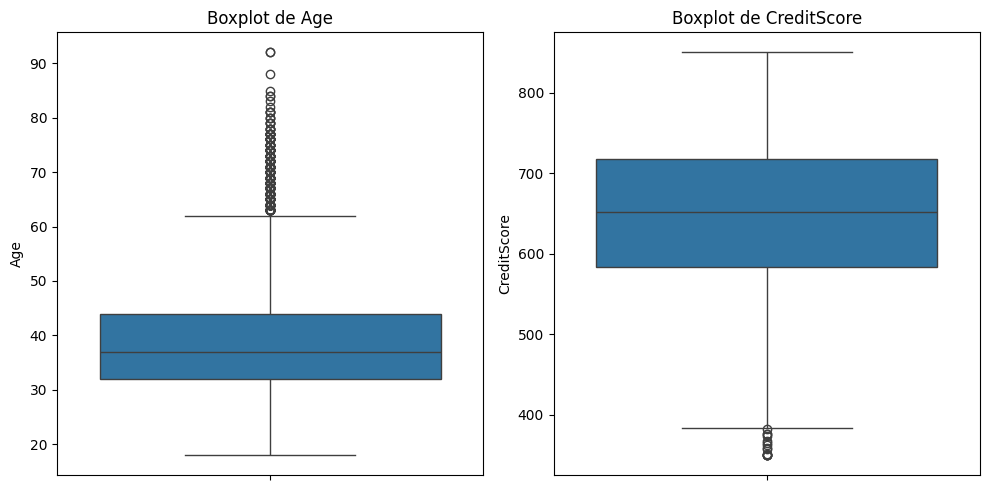

Outliers en Age: 359
Outliers en CreditScore: 15


In [ ]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['Age', 'CreditScore']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

for col in ['Age', 'CreditScore']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers en {col}: {len(outliers)}")

### Observaciones:
Edad:
Hay muchos outliers en la parte superior (círculos por encima del bigote superior), esto significa que hay un grupo significativo de clientes mayores de 60-65 años que se comportan de manera distinta al promedio.

Puntaje de Crédito:
La mediana está alrededor de 650, hay algunos outliers en la parte inferior (gente con score muy bajo, < 400), esto tiene sentido ya que serian clientes riesgosos.

##  Analisis de correlacion

### Matriz de correlación

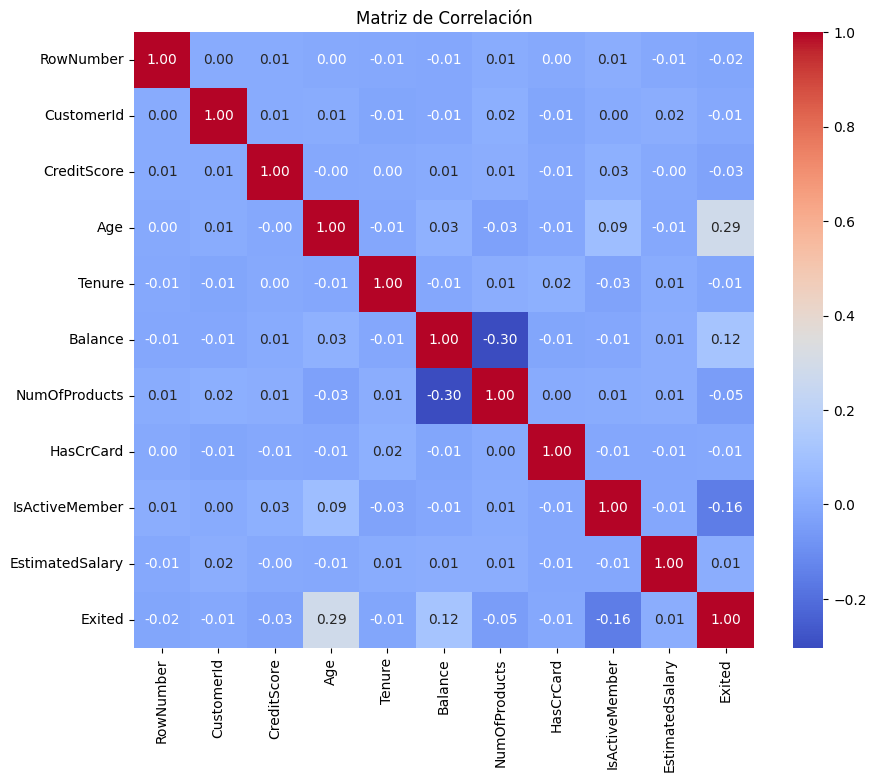

In [ ]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Observaciones:
Esta matriz nos dice qué variables se mueven juntas, los colores rojos indican correlación positiva y los azules negativa.

Age vs Exited (0.29): A mayor edad, mayor probabilidad de abandonar el banco.

Balance vs NumOfProducts (-0.30): Los clientes con más productos tienden a tener menos saldo en la cuenta.

Exited vs IsActiveMember (-0.16): Los miembros activos se van menos.

El resto de variables se observa que no tienen ningun tipo de relacion.

### Scatter plot

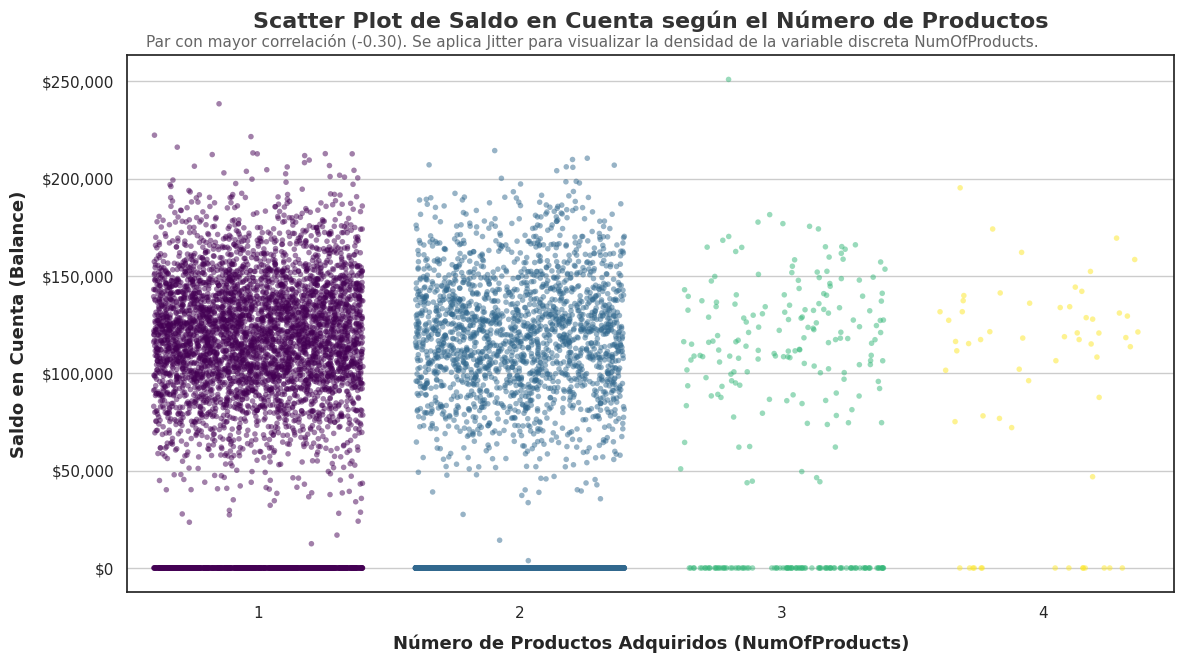

In [ ]:
sns.set_theme(style="whitegrid", rc={"axes.edgecolor": "0.15", "axes.linewidth": 1.25})
plt.figure(figsize=(12, 7))

sns.stripplot(
    data=df,
    x='NumOfProducts',
    y='Balance',
    hue='NumOfProducts',
    palette='viridis',
    alpha=0.50,
    jitter=0.4,
    size=4,
    legend=False
)

plt.title('Scatter Plot de Saldo en Cuenta según el Número de Productos',
          fontsize=16, fontweight='bold', pad=20, color='#333333')
plt.suptitle('Par con mayor correlación (-0.30). Se aplica Jitter para visualizar la densidad de la variable discreta NumOfProducts.',
             fontsize=11, y=0.91, color='#666666')

plt.xlabel('Número de Productos Adquiridos (NumOfProducts)', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Saldo en Cuenta (Balance)', fontsize=13, fontweight='bold', labelpad=10)

formatter = ticker.FuncFormatter(lambda x, p: f"${x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Observaciones:

Aquí se puede observar la relación negativa en la matriz de correlación.

1 y 2 productos: Aquí está la gran cantidad de clientes y donde se concentra el dinero. Se puede observar nubes densas de puntos tanto en saldos altos como en saldos de $0.

3 y 4 productos: Aquí hay muchos menos clientes. Se puede observar cómo en la columna 3 y 4, los puntos tienden a estar más bajos o dispersos, y hay menos densidad en los saldos altos comparado con las columnas 1 y 2.
Esto explica la correlación negativa de -0.30, al aumentar el número de productos, el saldo tiende a bajar o a ser menos consistente.